<a href="https://colab.research.google.com/github/RanudeeFernando/CM2604_ML_CW/blob/main/notebooks/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Client Subscription to Term Deposits Using Bank Marketing Data

**Description of Dataset**

The dataset used in this study was taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing) and it contains information related to a direct marketing campaign conducted by a Portuguese banking institution.

The goal of this study is to predict whether a client will subscribe to a long-term deposit (target variable: y).




## Explore Dataset

In [2]:
import pandas as pd

# Define file path to dataset
file_path = "https://raw.githubusercontent.com/RanudeeFernando/CM2604_ML_CW/refs/heads/main/data/bank-full.csv"

# Load the dataset
df = pd.read_csv(file_path, sep=';')


HTTPError: HTTP Error 404: Not Found

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd

# Define file path to dataset
file_path = "/content/drive/MyDrive/CM2604 Machine Learning/CW/bank-full.csv"

# Load the dataset and create a data frame
# Use ';' as the separator
df = pd.read_csv(file_path, sep=';')

Mounted at /content/drive


In [4]:
# View first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Check shape of dataset
print("Shape of dataset:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Shape of dataset:
Number of Rows: 45211
Number of Columns: 17


In [6]:
# Display information about dataset
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Display summary statistics for numerical columns
print("Statistical summary of numerical columns:")
display(df.describe())

Statistical summary of numerical columns:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Strip spaces from all categorical columns
for col in categorical_columns:
    df[col] = df[col].str.strip()

In [9]:
# Display summary of unique values for categorical columns
print("Unique values in categorical columns:\n")
for column in categorical_columns:
  print(f"Column: {column}")
  print(df[column].unique())
  print()

Unique values in categorical columns:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']



In [10]:
# Define target variable
target_variable = 'y'

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Exclude target variable from categorical features
if target_variable in categorical_features:
  categorical_features.remove(target_variable)

# Display the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target Variable:", target_variable)

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Target Variable: y


## Exploratory Data Analysis

1. **Handle Missing Values**

In [11]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
print("\n")

# Check if there are any missing values
if missing_values.sum() == 0:
  print("No missing values found.")
else:
  print("Missing values have been found and require handling.")


Missing Values per Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


No missing values found.


2. Analyse target variable

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

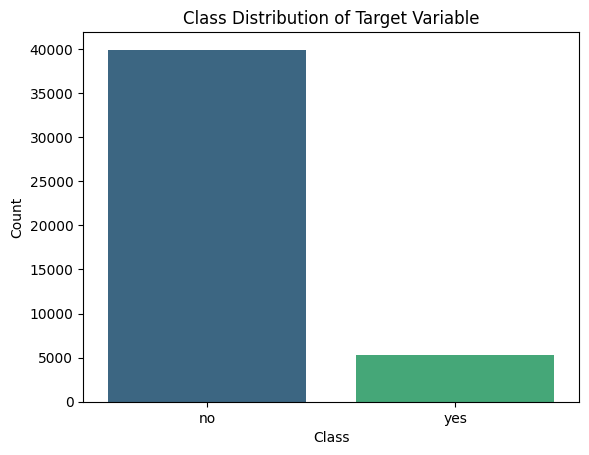

In [13]:
# Plot the count distribution of target variable
sns.countplot(x='y', data=df, hue='y', palette='viridis')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

3. Analyse numerical features

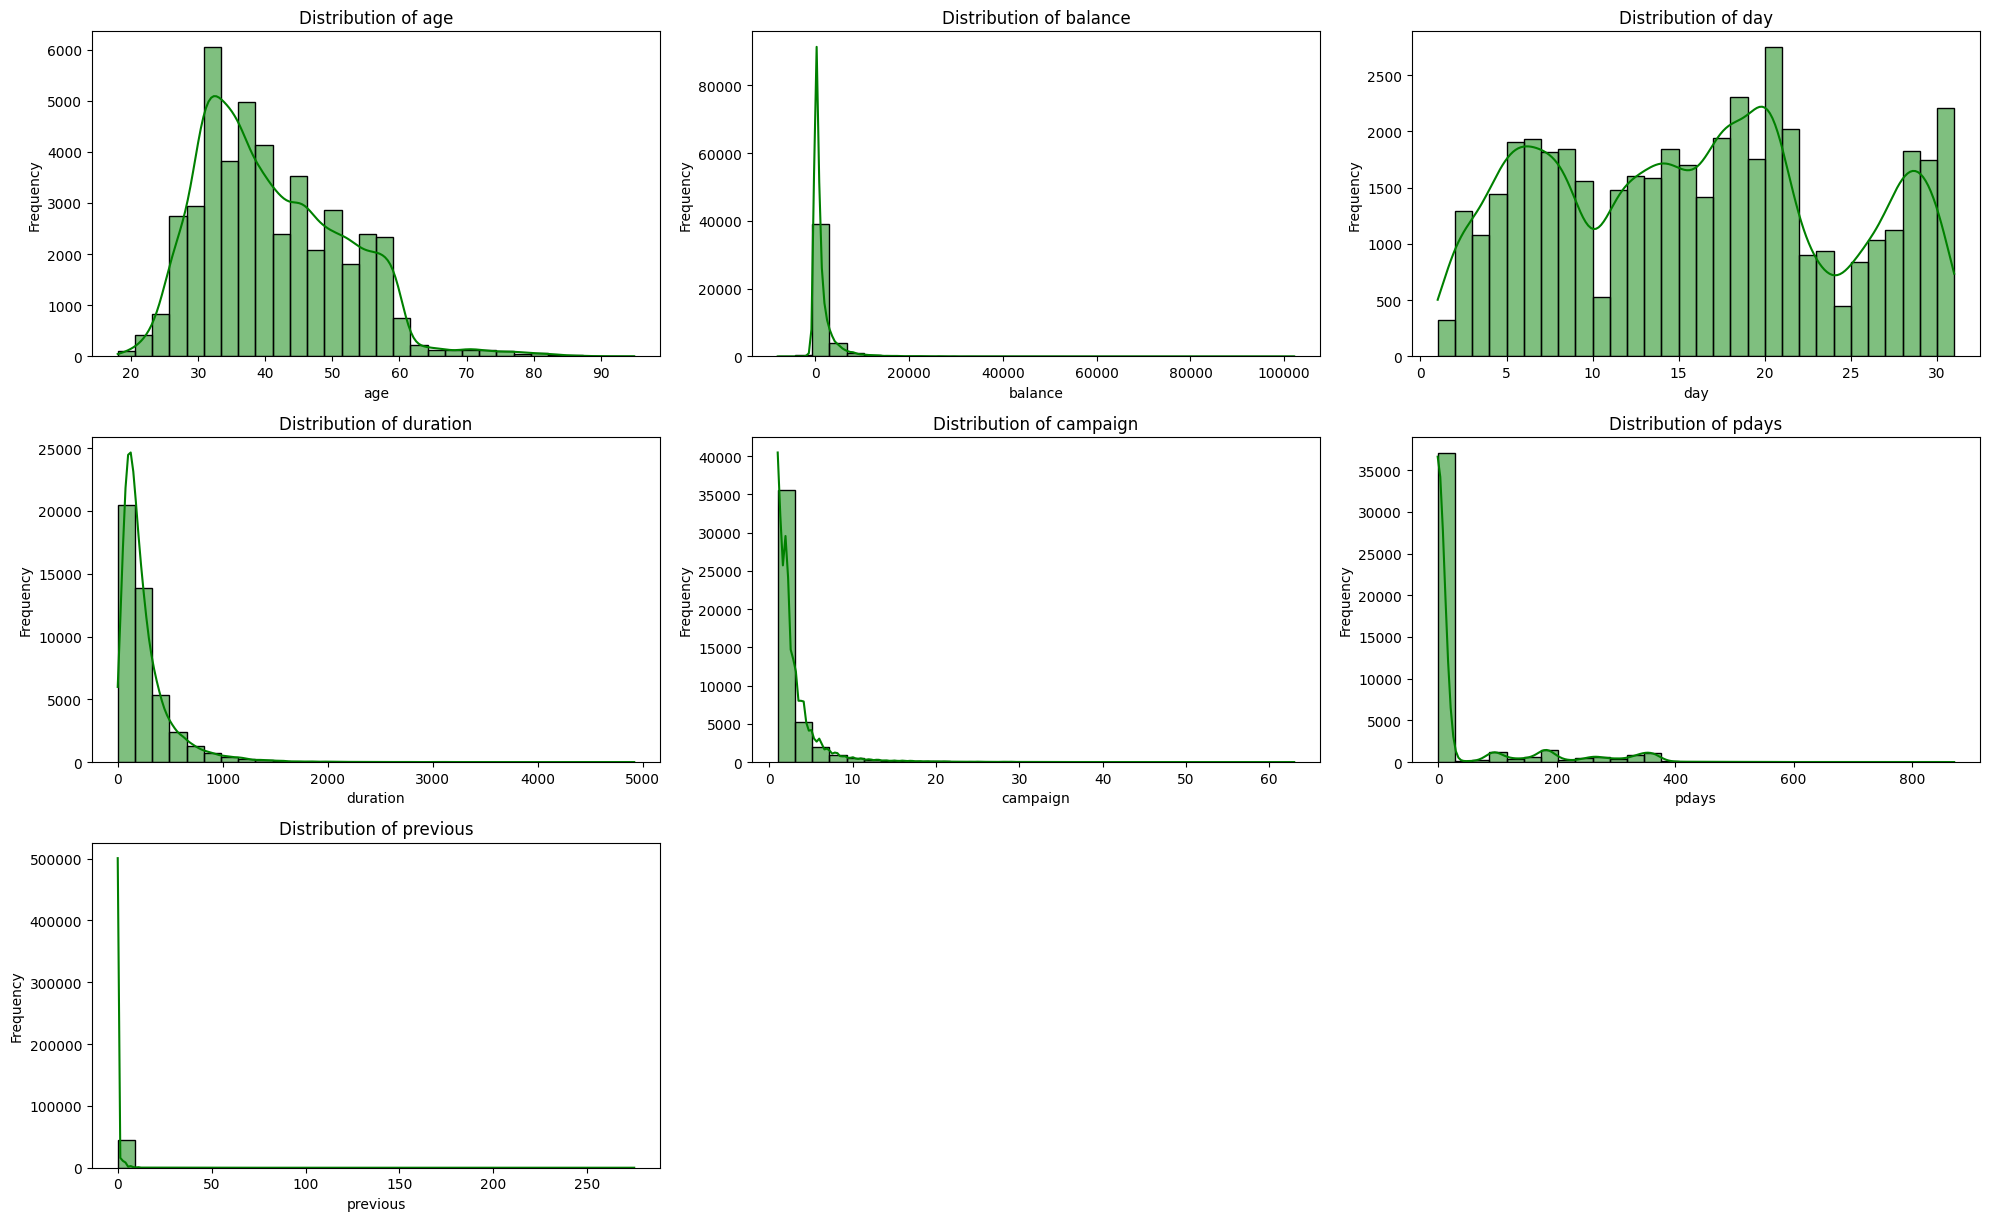

In [14]:

# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    plt.subplot(5, 3, plot_number)

    # Plot the histogram
    sns.histplot(df[column], kde=True, bins=30, color="green")

    # Add title and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()

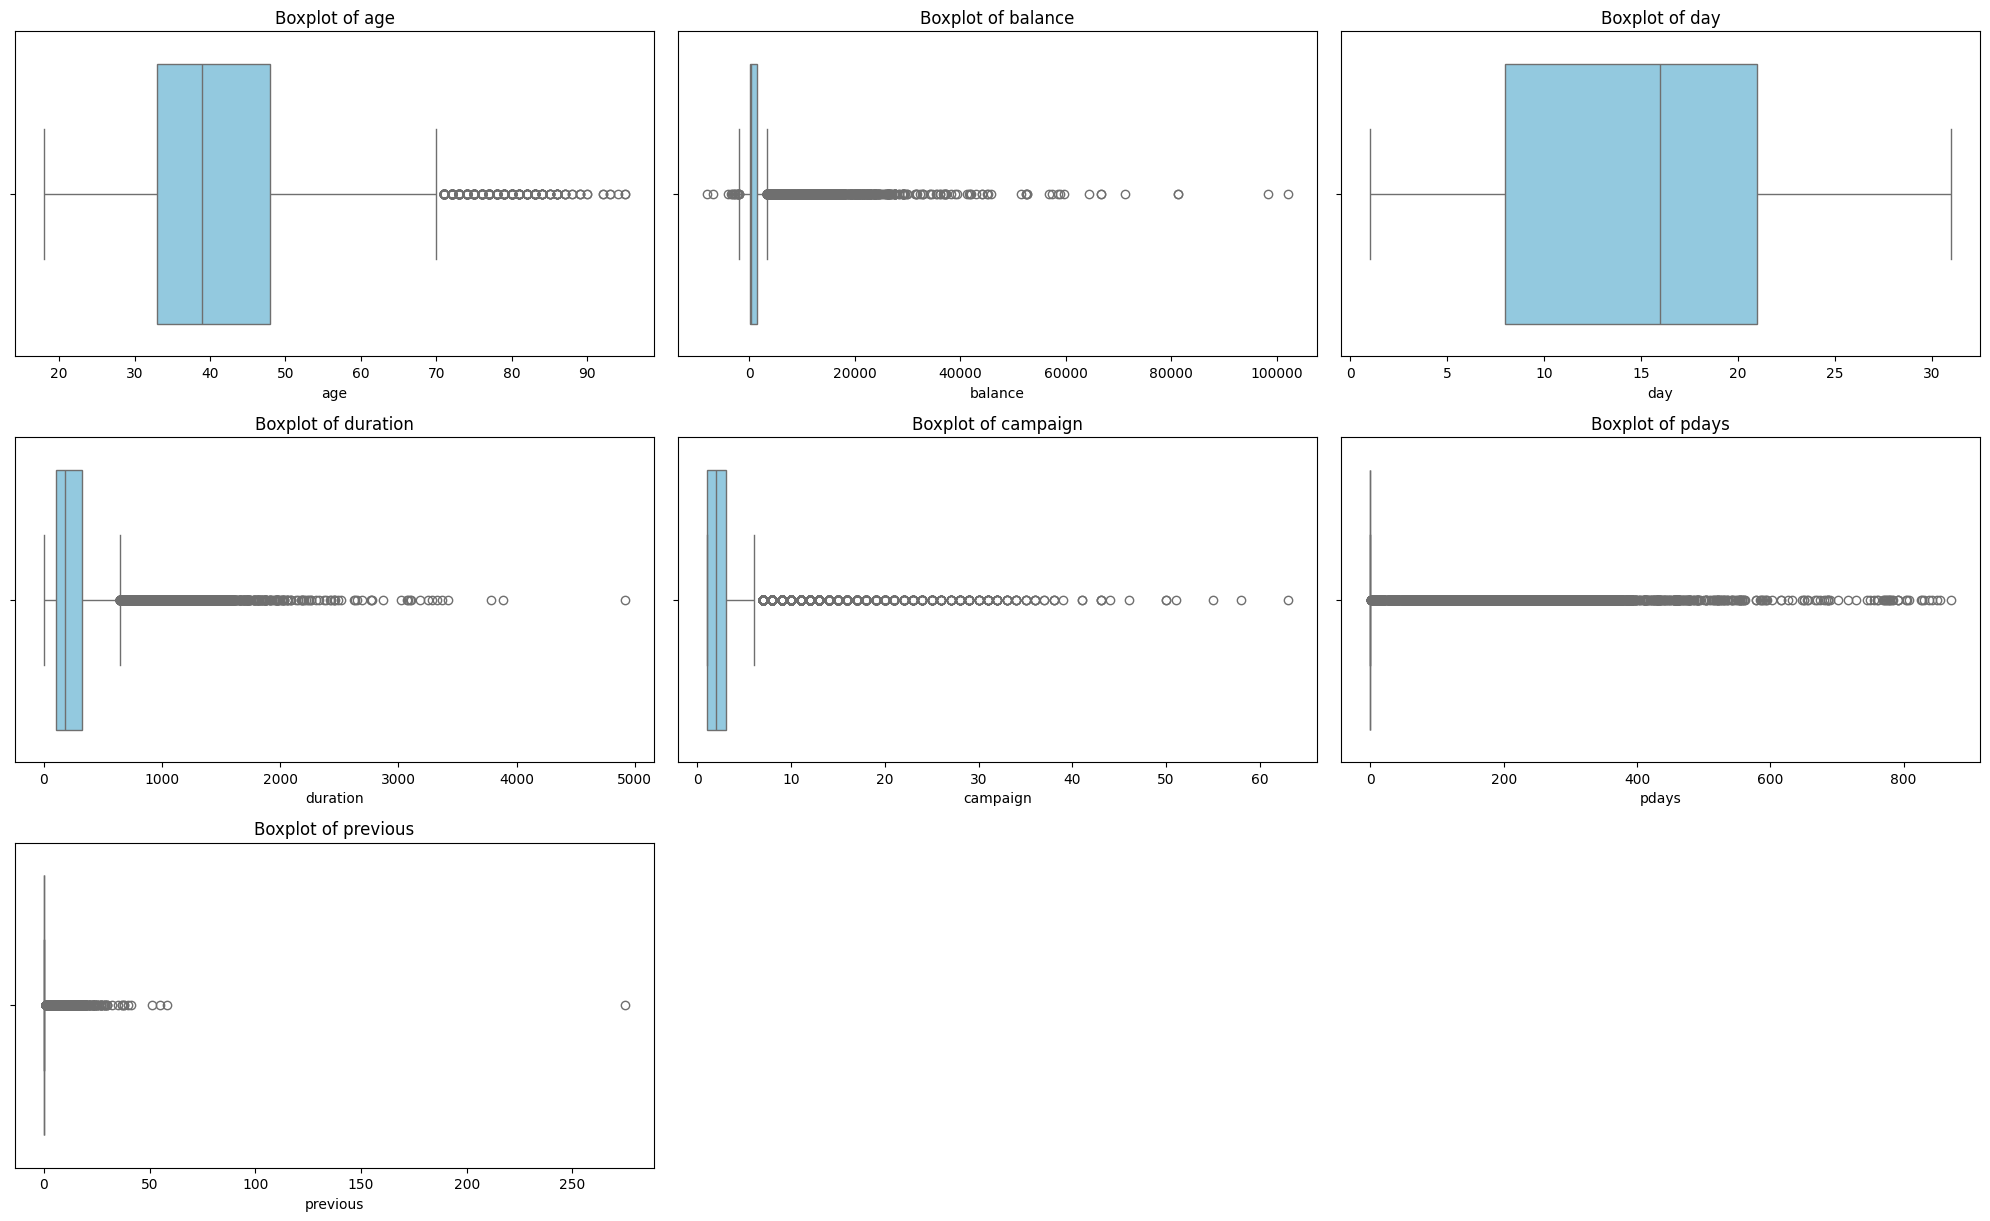

In [15]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    plt.subplot(5, 3, plot_number)

    # Plot boxplot
    sns.boxplot(x=df[column], color="skyblue")

    # Add title and labels
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()

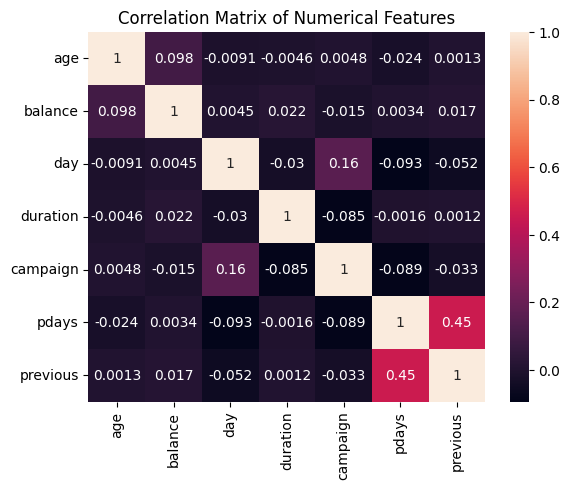

In [16]:
# Compute correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

# Create a heatmap to visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)

# Display heatmap
plt.title("Correlation Matrix of Numerical Features")
plt.show()

4. Analyse categorical features

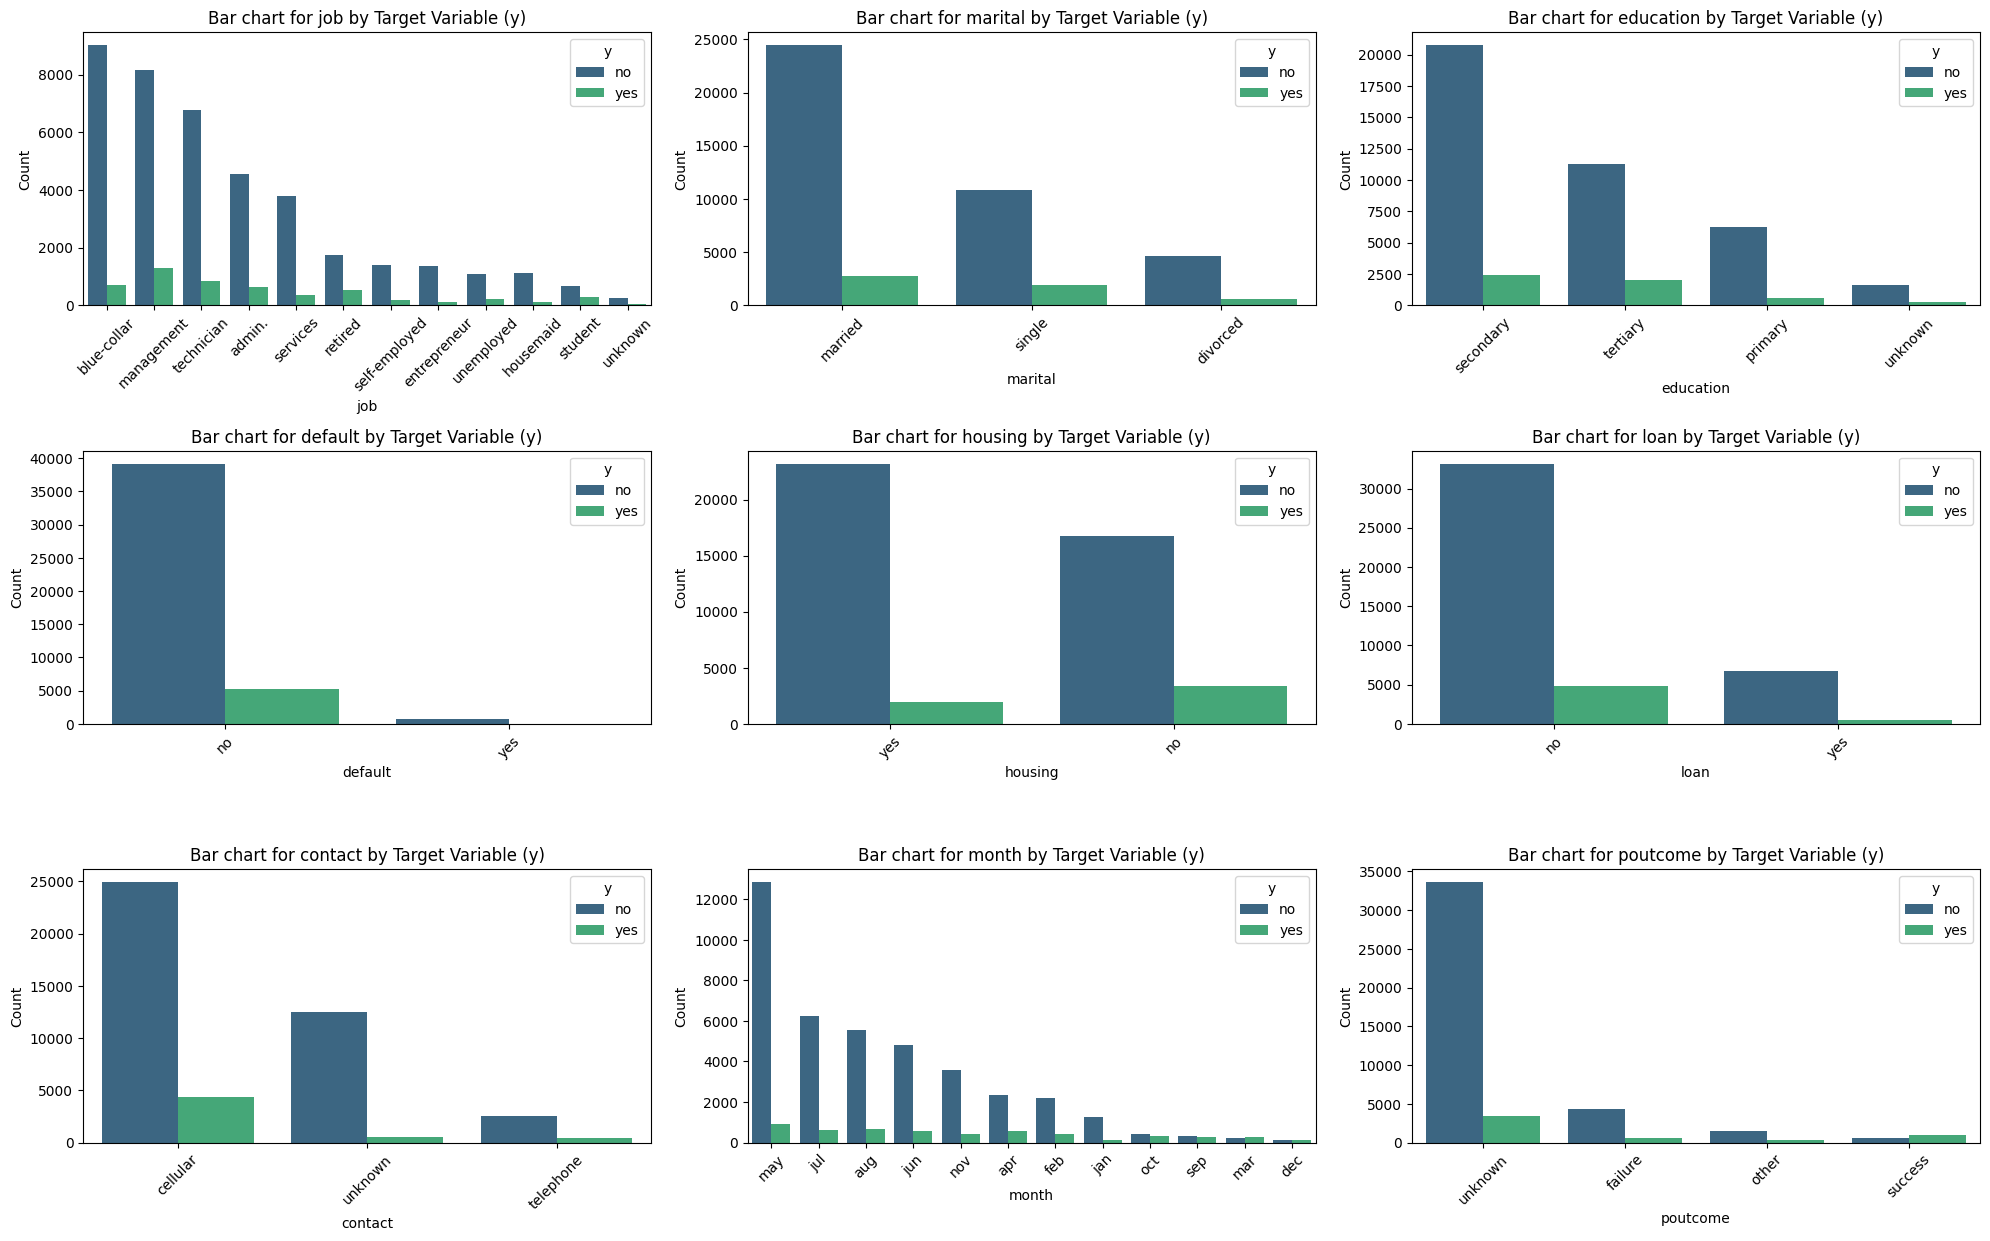

In [17]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each categorical feature
for column in categorical_features:
    # Add a subplot at the specified position
    plt.subplot(5, 3, plot_number)

    # Plot the countplot with target variable
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, hue='y', palette="viridis")

    # Add title and labels
    plt.title(f"Bar chart for {column} by Target Variable (y)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()


## Data Preprocessing

1. Handling outliers

In [18]:
# Function to count outliers
def count_outliers(df, column):
    # Calculate thresholds
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)

    # Round thresholds to the nearest integer
    lower_bound = round(lower_bound)
    upper_bound = round(upper_bound)

    # Count outliers
    lower_outliers = (df[column] < lower_bound).sum()
    upper_outliers = (df[column] > upper_bound).sum()
    total_outliers = lower_outliers + upper_outliers

    # Print summary
    print(f"Outliers in '{column}': Total = {total_outliers}, Lower = {lower_outliers}, Upper = {upper_outliers}")


In [19]:
# Display number of outliers for each numerical variable
for column in numerical_features:
    count_outliers(df, column)

Outliers in 'age': Total = 738, Lower = 305, Upper = 433
Outliers in 'balance': Total = 902, Lower = 450, Upper = 452
Outliers in 'day': Total = 322, Lower = 322, Upper = 0
Outliers in 'duration': Total = 870, Lower = 418, Upper = 452
Outliers in 'campaign': Total = 451, Lower = 0, Upper = 451
Outliers in 'pdays': Total = 385, Lower = 0, Upper = 385
Outliers in 'previous': Total = 361, Lower = 0, Upper = 361


In [20]:
# Function to handle extreme values
def cap_outliers(df, column):

    # Calculate thresholds
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)

    # Round thresholds to the nearest integer
    lower_bound = round(lower_bound)
    upper_bound = round(upper_bound)

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Print summary
    print(f"Handled outliers in '{column}': Capped values below {lower_bound} and above {upper_bound}.")

    return df


In [21]:
# Capping outliers in numerical variables
for column in numerical_features:
    df = cap_outliers(df, column)

Handled outliers in 'age': Capped values below 23 and above 71.
Handled outliers in 'balance': Capped values below -627 and above 13165.
Handled outliers in 'day': Capped values below 2 and above 31.
Handled outliers in 'duration': Capped values below 11 and above 1269.
Handled outliers in 'campaign': Capped values below 1 and above 16.
Handled outliers in 'pdays': Capped values below -1 and above 370.
Handled outliers in 'previous': Capped values below 0 and above 9.


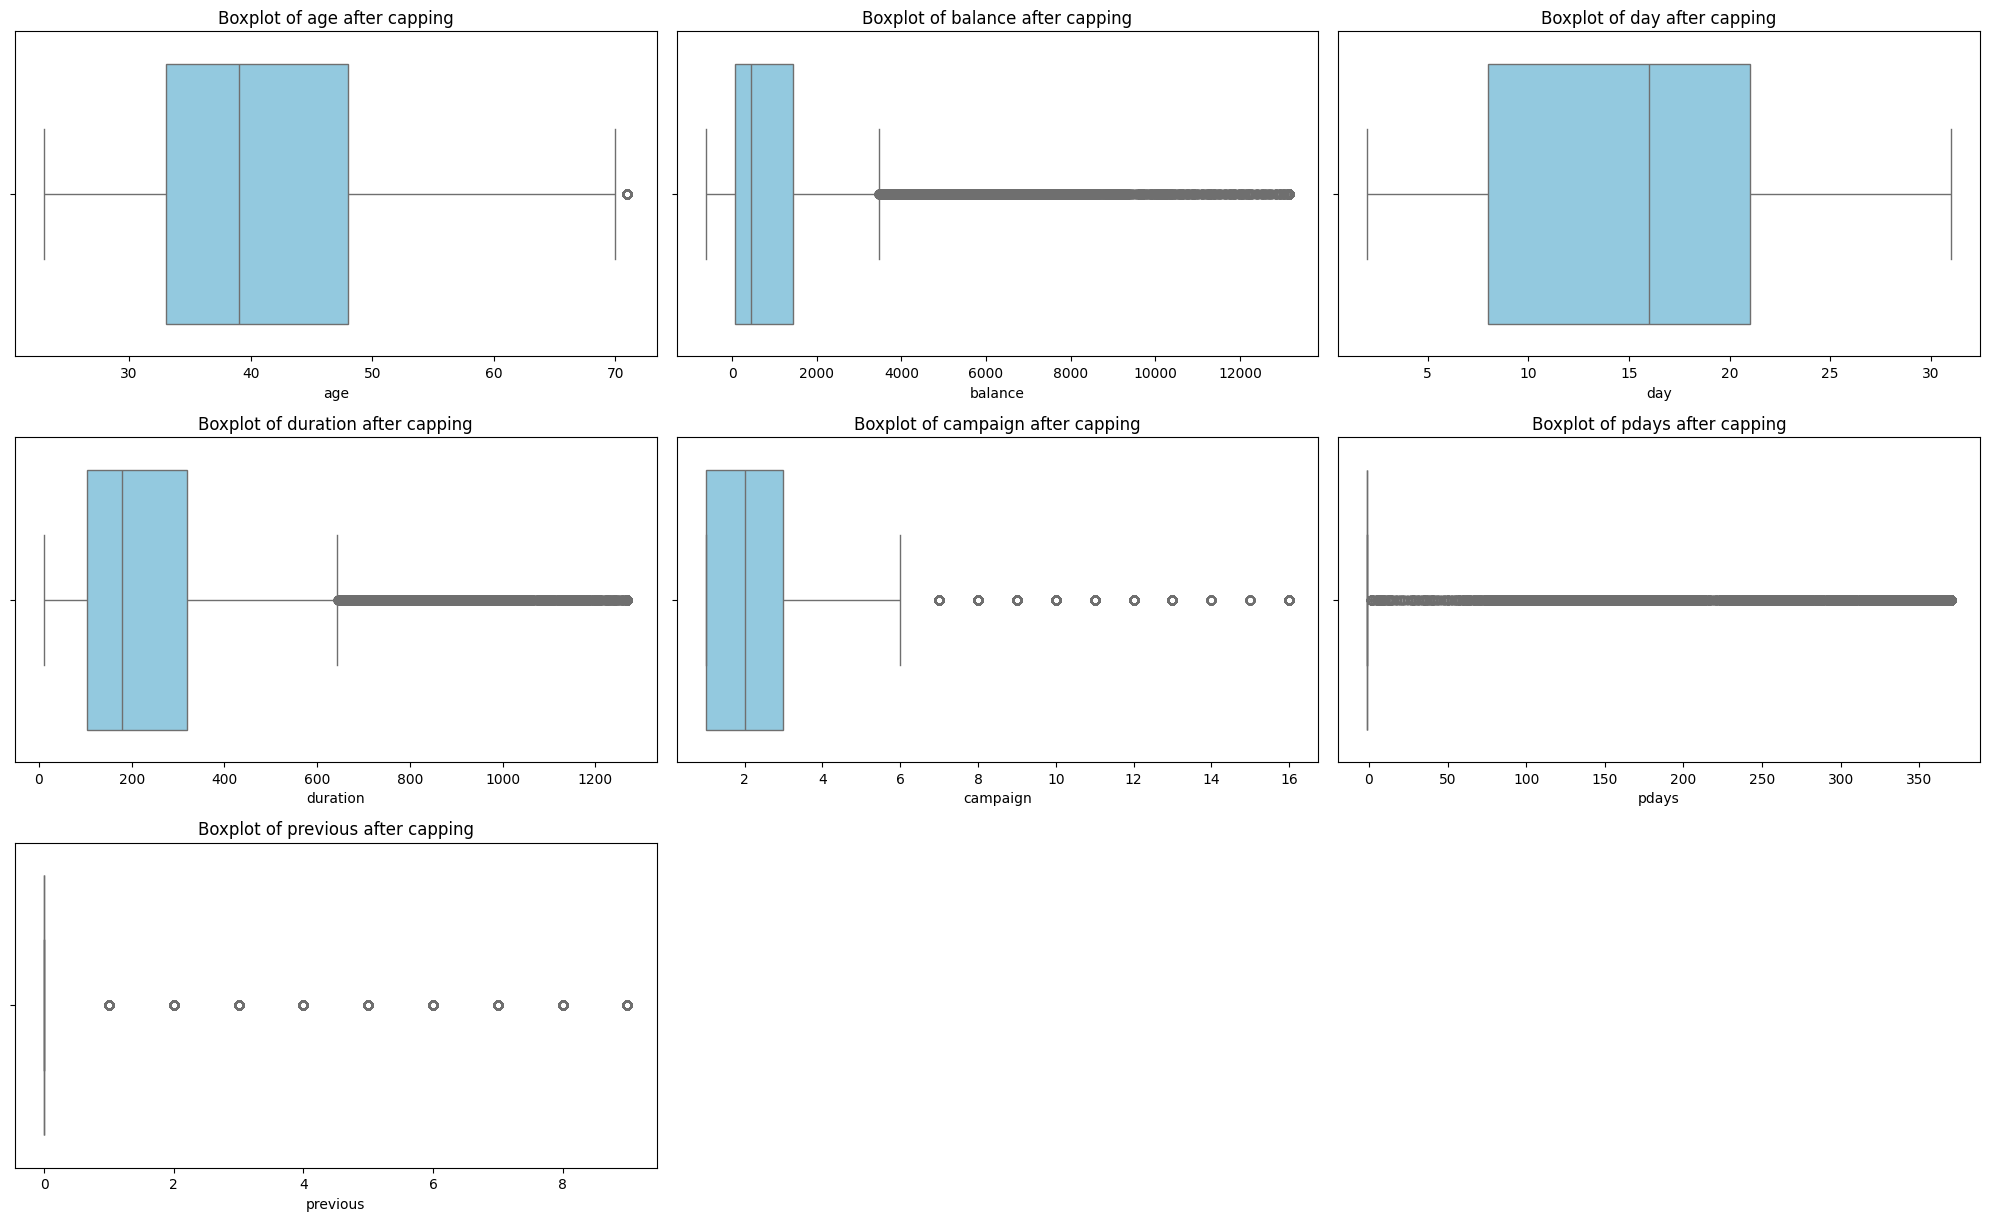

In [22]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    # Add a subplot at the specified position
    plt.subplot(5, 3, plot_number)

    # Plot the boxplot
    sns.boxplot(x=df[column], color="skyblue")

    # Add title and labels
    plt.title(f"Boxplot of {column} after capping")
    plt.xlabel(column)

    # Increment the plot number
    plot_number += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
# Display number of outliers for each numerical variable after capping
for column in numerical_features:
    count_outliers(df, column)

Outliers in 'age': Total = 0, Lower = 0, Upper = 0
Outliers in 'balance': Total = 0, Lower = 0, Upper = 0
Outliers in 'day': Total = 0, Lower = 0, Upper = 0
Outliers in 'duration': Total = 0, Lower = 0, Upper = 0
Outliers in 'campaign': Total = 0, Lower = 0, Upper = 0
Outliers in 'pdays': Total = 0, Lower = 0, Upper = 0
Outliers in 'previous': Total = 0, Lower = 0, Upper = 0


2. Encode data

In [24]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Split into binary and multi-valued features
binary_features = [col for col in categorical_columns if df[col].nunique() == 2]
multi_valued_features = [col for col in categorical_columns if df[col].nunique() > 2]

print("Binary features:", binary_features)
print("Multi-valued features:", multi_valued_features)

Binary features: ['default', 'housing', 'loan', 'y']
Multi-valued features: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [25]:
# Create a copy of the original DataFrame for transformations
df2 = df.copy()

In [26]:
# Apply binary encoding
for col in binary_features:
    mapping = {df2[col].unique()[0]: 0, df2[col].unique()[1]: 1}
    df2[col] = df2[col].map(mapping)

    # Display the mapping for each column
    print(f"Binary encoded: {col} -> {mapping}")


Binary encoded: default -> {'no': 0, 'yes': 1}
Binary encoded: housing -> {'yes': 0, 'no': 1}
Binary encoded: loan -> {'no': 0, 'yes': 1}
Binary encoded: y -> {'no': 0, 'yes': 1}


In [27]:
# Perform one-hot encoding
df2 = pd.get_dummies(df2, columns=multi_valued_features, drop_first=True).astype(int)

print("One-hot encoded multi-category features.")

One-hot encoded multi-category features.


In [28]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display transformed data frame
display(df2.head())

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,0,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,0,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,0,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,0,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,1,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


3. Split dataset into training and testing data

In [29]:
from sklearn.model_selection import train_test_split

# Define target and features
target_column = 'y'
X = df2.drop(columns=[target_column])  # Features
y = df2[target_column]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (36168, 42)
X_test shape: (9043, 42)


4. Scale Data

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and testing sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Scaled data in both training and testing sets.")

Scaled data in both training and testing sets.


In [32]:
# Display the head of the scaled training data
print("Scaled Training Data:")
display(X_train.head())

# Display the head of the scaled testing data
print("\nScaled Testing Data:")
display(X_test.head())

Scaled Training Data:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,0.011341,0,-0.190925,0,0,-0.099214,-0.776479,-0.653044,-0.419941,-0.359443,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
17965,0.781273,0,0.060657,0,0,1.705067,0.068427,-0.266754,-0.419941,-0.359443,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
18299,0.107583,0,1.139439,1,0,1.825353,-0.527725,0.505825,-0.419941,-0.359443,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10221,-0.373625,0,-0.621193,0,0,-0.580355,0.523047,3.209854,-0.419941,-0.359443,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
32192,1.454964,0,0.986534,1,0,-0.099214,0.046983,-0.266754,-0.419941,-0.359443,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1



Scaled Testing Data:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,-0.084901,0,-0.310493,0,0,0.021072,-0.261815,-0.653044,-0.419941,-0.359443,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9928,0.588790,0,1.051430,1,0,-0.820926,-0.729302,-0.266754,-0.419941,-0.359443,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
33409,-1.528523,0,-0.329162,0,0,0.502213,-0.115994,-0.653044,-0.419941,-0.359443,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31885,0.107583,0,0.219785,1,0,-0.820926,0.248559,-0.653044,3.093347,0.322202,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15738,1.454964,0,-0.471844,1,1,0.622499,-0.566325,-0.266754,-0.419941,-0.359443,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


5. Balance training data

In [33]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [34]:
# Check the shape of resampled data
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Before SMOTE:
y
0    31970
1     4198
Name: count, dtype: int64

After SMOTE:
y
0    31970
1    31970
Name: count, dtype: int64


## Model Implementation

1. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train on resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Random Forest Results:")
print(classification_report(y_test, rf_y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_y_pred_proba)}")


Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7952
           1       0.55      0.63      0.59      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.78      0.76      9043
weighted avg       0.90      0.89      0.90      9043

ROC-AUC Score: 0.9228941476540267


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [41]:
# Initialize RF classifier with best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

In [54]:
# Train tuned model
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
best_rf_y_pred = best_rf.predict(X_test)
best_rf_y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Random Forest Results:")
print(classification_report(y_test, best_rf_y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_rf_y_pred_proba)}")


Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7952
           1       0.54      0.65      0.59      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.79      0.76      9043
weighted avg       0.90      0.89      0.90      9043

ROC-AUC Score: 0.9249794712362165


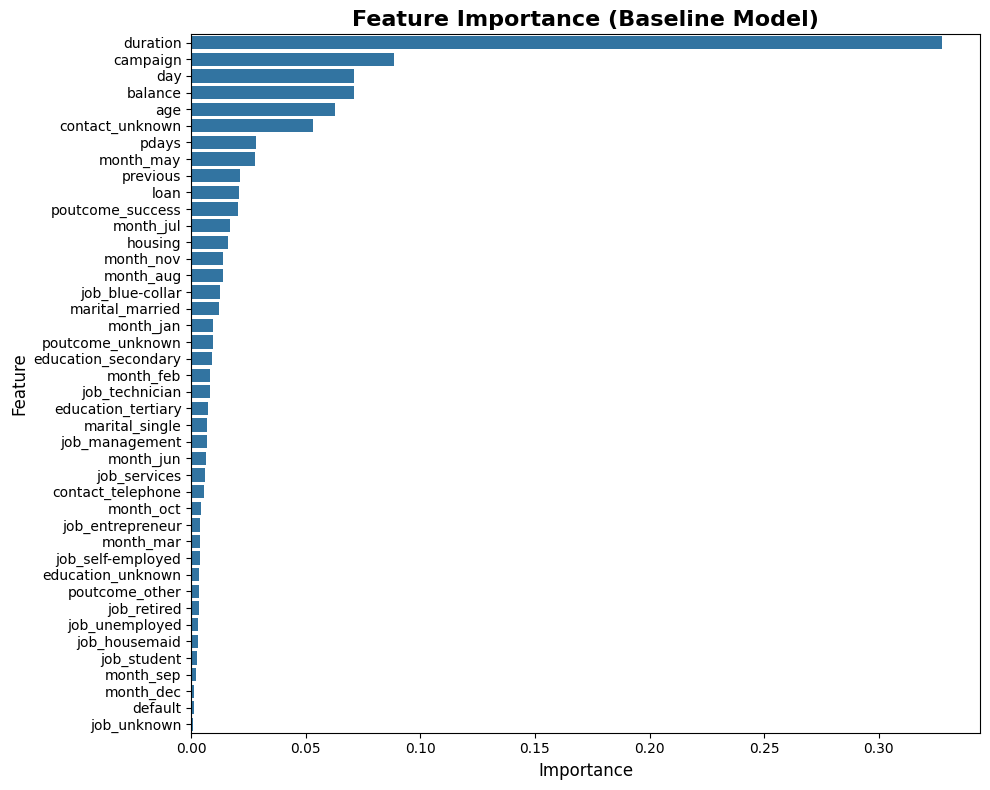

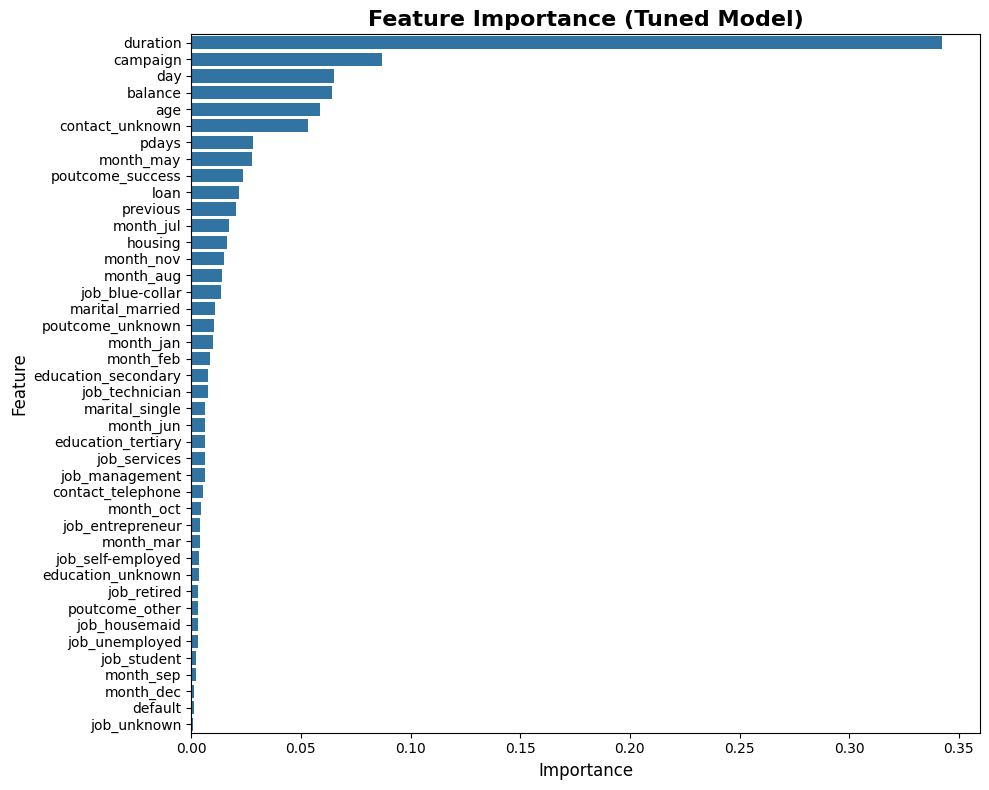

In [58]:
# Get feature names
feature_names = X_train_resampled.columns

# Get feature importances for both models
baseline_importances = rf_model.feature_importances_
tuned_importances = best_rf.feature_importances_

# Create DataFrame for baseline model
baseline_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': baseline_importances}).sort_values(by='Importance', ascending=False)

# Create DataFrame for tuned model
tuned_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': tuned_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance for baseline model
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=baseline_importance_df)
plt.title('Feature Importance (Baseline Model)', fontsize=16, weight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Plot feature importance for tuned model
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=tuned_importance_df)
plt.title('Feature Importance (Tuned Model)', fontsize=16, weight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

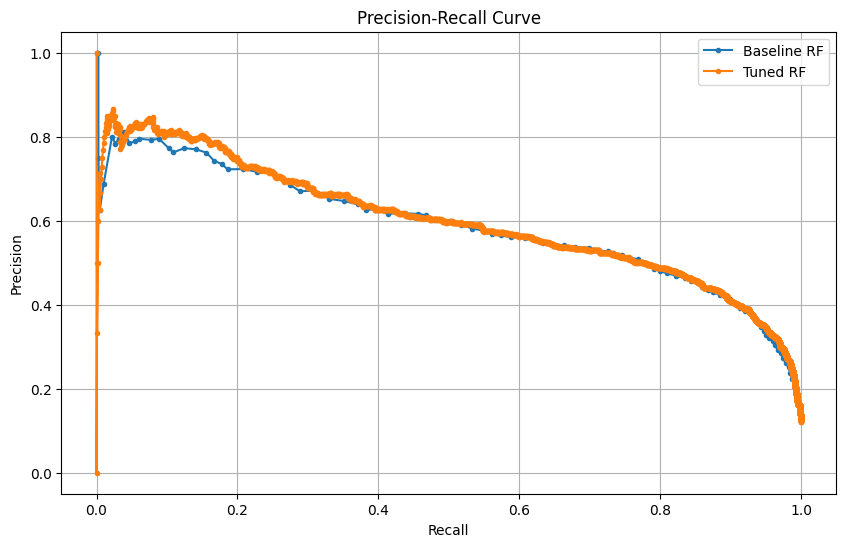

In [59]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for baseline RF
baseline_precision, baseline_recall, thresholds = precision_recall_curve(y_test, rf_y_pred_proba)

# Calculate precision and recall for tuned RF
tuned_precision, tuned_recall, thresholds = precision_recall_curve(y_test, best_rf_y_pred_proba)

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(baseline_recall, baseline_precision, label='Baseline RF', marker='.')
plt.plot(tuned_recall, tuned_precision, label='Tuned RF', marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


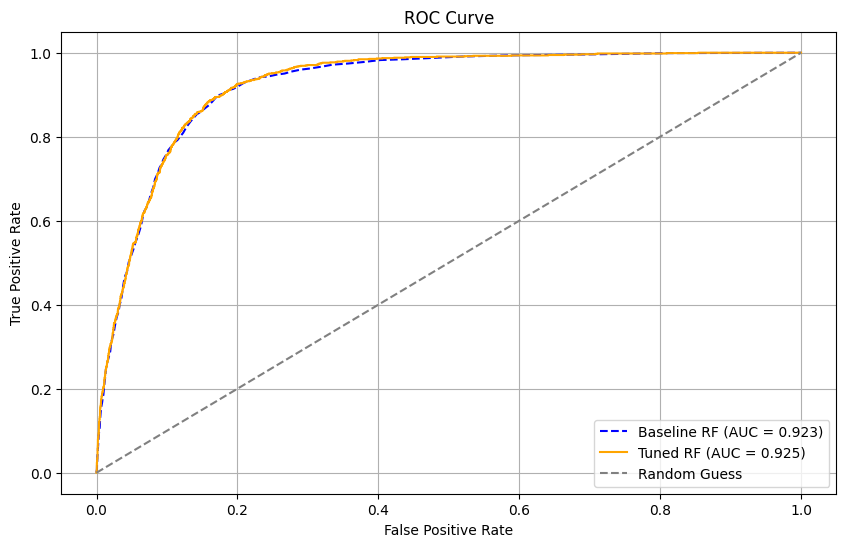

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for baseline model
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
baseline_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)

# Compute ROC curve and AUC for tuned model
tuned_fpr, tuned_tpr, _ = roc_curve(y_test, best_rf_y_pred_proba)
tuned_roc_auc = roc_auc_score(y_test, best_rf_y_pred_proba)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(baseline_fpr, baseline_tpr, label=f'Baseline RF (AUC = {baseline_roc_auc:.3f})', linestyle='--', color='blue')
plt.plot(tuned_fpr, tuned_tpr, label=f'Tuned RF (AUC = {tuned_roc_auc:.3f})', linestyle='-', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


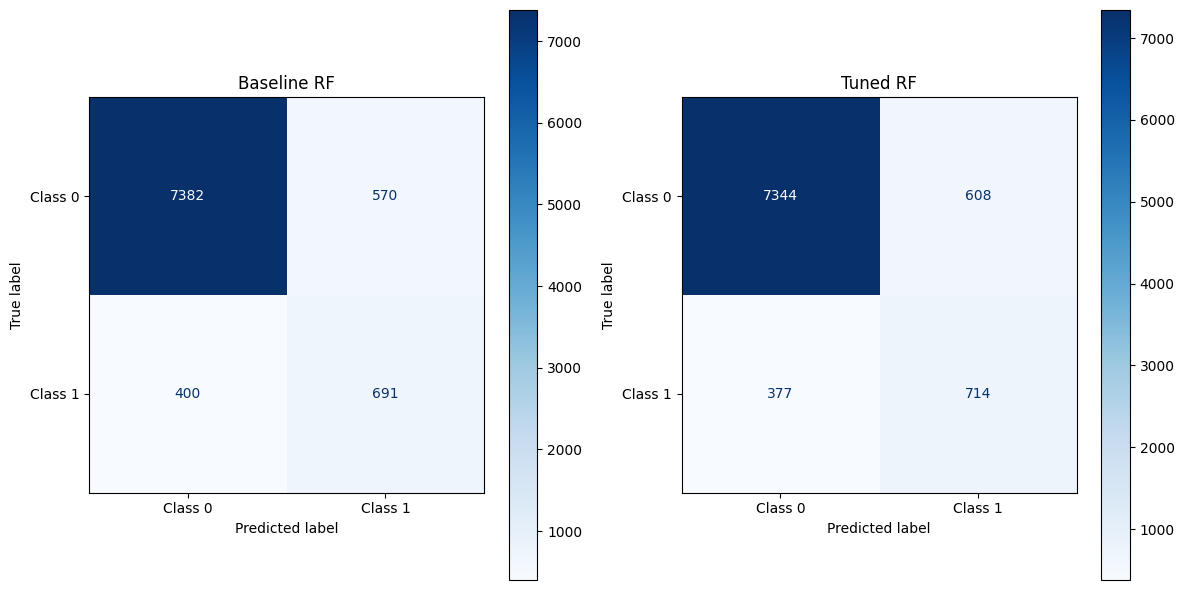

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix for Baseline RF
baseline_cm = confusion_matrix(y_test, rf_y_pred)

# Compute confusion matrix for Tuned RF
tuned_cm = confusion_matrix(y_test, best_rf_y_pred)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot Baseline RF Confusion Matrix
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=baseline_cm, display_labels=['Class 0', 'Class 1'])
disp_baseline.plot(cmap='Blues', ax=axes[0])  # Use ax[0] for the first subplot
axes[0].set_title('Baseline RF')

# Plot Tuned RF Confusion Matrix
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=tuned_cm, display_labels=['Class 0', 'Class 1'])
disp_tuned.plot(cmap='Blues', ax=axes[1])  # Use ax[1] for the second subplot
axes[1].set_title('Tuned RF')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



2. Neural Network

In [47]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define the model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = nn_model.fit(X_train_resampled, y_train_resampled, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the original test set
nn_y_pred_proba = nn_model.predict(X_test).ravel()  # Predict probabilities
nn_y_pred = (nn_y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification metrics
print("Neural Network Results:")
print(classification_report(y_test, nn_y_pred))  # Classification report
print(f"ROC-AUC Score: {roc_auc_score(y_test, nn_y_pred_proba)}")  # ROC-AUC score


Epoch 1/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8183 - loss: 0.3915 - val_accuracy: 0.8753 - val_loss: 0.3416
Epoch 2/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8797 - loss: 0.2826 - val_accuracy: 0.8931 - val_loss: 0.3024
Epoch 3/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8867 - loss: 0.2674 - val_accuracy: 0.9019 - val_loss: 0.2855
Epoch 4/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8898 - loss: 0.2589 - val_accuracy: 0.9026 - val_loss: 0.2795
Epoch 5/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8923 - loss: 0.2537 - val_accuracy: 0.9032 - val_loss: 0.2742
Epoch 6/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8938 - loss: 0.2493 - val_accuracy: 0.9037 - val_loss: 0.2683
Epoch 7/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2456 - val_accuracy: 0.9039 - val_loss: 0.2643
Epoch 8/30
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8963 - loss: 0.2421 - 

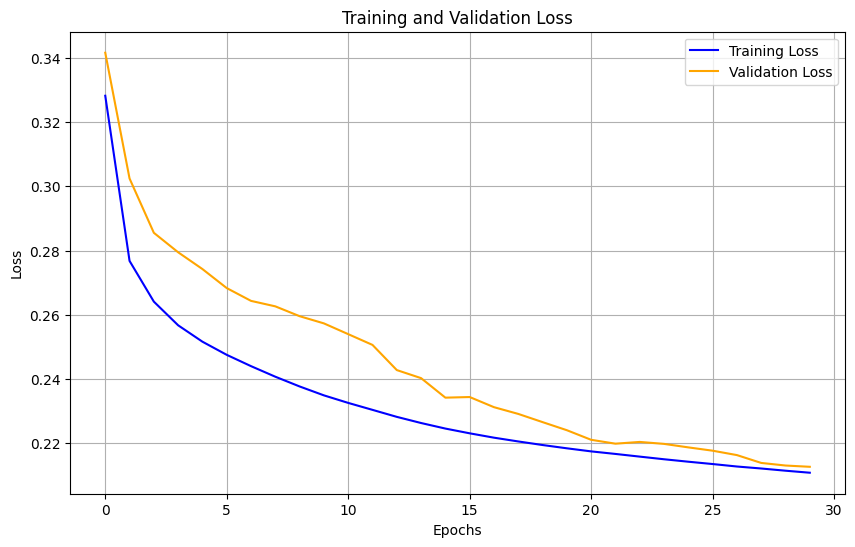

In [50]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

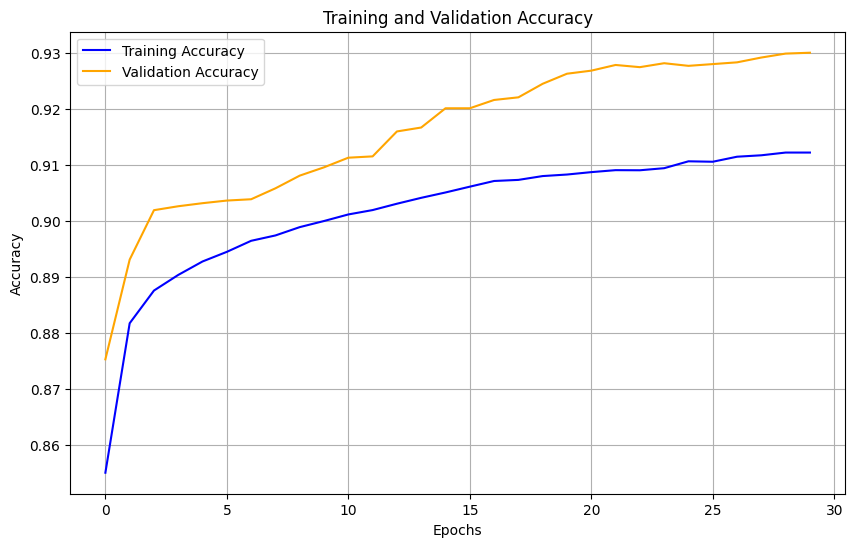

In [51]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()